##  Проект:'НКО Благотворительная больница'  


## 1  Описание проекта:

В нашем распоряжении находятся данные о пожертвованиях и рекламных кампаниях

Цель исследования: проанализировать эффективность маркетингового подхода на основе данных о пожертвованиях и рекламных кампаниях.

## 2 Описание данных

Необходимые данные расположены в файле: '/2022-07-19_2023-07-19_adgrants-charityhospital (1).csv','/clients.xlsx','/donors (1).xlsx'

Всего в датафрейме donors 14 столбцов:

* ID;
* Тип донора;
*	Дата первого пожертвования;
* Сумма первого пожертвования;
*	Кампания первого пожертвования;
* Метки донора;
* Кампании;
*	Платёжные операторы;
* Дата последнего пожертвования;
* Сумма последнего пожертвования;
* Кампания последнего пожертвования;
* Общая сумма пожертвований;
* Валюта;
* Код

Всего в таблице clients 16 столбцов:

* id;
* Первый платеж;
* Подписки вкл;
* Подписки выкл;
*	Типы оплаты;
* Платежей за год;
*	Сумма за год;
*	Средний платеж в год;
* Всего платежей;
*	Сумма всего ;
*	Средний платеж ;
* Сумма за месяц;
* Страны;
* Регионы;
*	Последний платеж
* Код

В таблице df_adgrants_last 46 столбцов:



Ход исследования содержит следующие этапы:

1) Загрузка данных и изучение общей информации

2) Предобработка данных

3) Исследовательский анализ данных

4) Проверка статистических гипотез

5) Общие выводы и рекомендации для заказчика

## 1 Загрузка данных и изучение общей информации

 Загрузим библиотеки, необходимые для работы


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mth
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [6]:
df_adgrants_first = pd.read_csv('/content/2022-07-19_2023-07-19_adgrants-charityhospital (1)(1).csv',sep = ';', nrows = 2)

df_adgrants_last = pd.read_csv('/content/2022-07-19_2023-07-19_adgrants-charityhospital (1)(1).csv',sep = ';', skiprows = 4)

In [7]:
df_adgrants_first.shape

(2, 1)

In [9]:
df_adgrants_first.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2 entries, ('Всего', nan, 'Ср.расход за день (руб.)', 'Показы', 'Взвешенные показы', 'Клики', 'CTR (%)', 'wCTR (%)', 'Расход (руб.)', 'Ср. цена клика (руб.)', 'Ср. ставка за клик (руб.)', 'Ср. позиция показов', 'Ср. объём трафика', 'Ср. позиция кликов', 'Отказы (%)', 'Ср. цена тыс. показов (руб.)', 'Глубина (стр.)', 'Конверсия (%)', 'Цена цели (руб.)', 'Конверсии', 'Рентабельность', 'Доля рекламных расходов', 'Доход (руб.)', 'Прибыль (руб.)', 'Сумма ВC', 'Цена ВC (руб.)', 'Доля ВC (%)', 'Проигрывание 25% ролика', 'Проигрывание 50% ролика', 'Проигрывание 75% ролика', 'Проигрывание 100% ролика', 'Доля проигрываний 25% ролика (%)', 'Доля проигрываний 50% ролика (%)', 'Доля проигрываний 75% ролика (%)', 'Доля проигрываний 100% ролика (%)', 'Ср. цена досмотра 100% ролика (руб.)', 'Видимые показы, стандарт MRC', 'Невидимые показы, стандарт MRC', 'Неустановленные показы, стандарт MRC', 'Доля измеряемых показов, стандарт MRC (%)') to ('с 19.07.

Объем данных составил 5.5 КB


In [10]:
# посмотрим на первые пять строк
df_adgrants_last.head()

,Дата,Кампания,№ Кампании,Метка,Условие показа,Пол,Уровень платежеспособности,Возраст,Показы,Взвешенные показы,...,Доля проигрываний 25% ролика (%),Доля проигрываний 50% ролика (%),Доля проигрываний 75% ролика (%),Доля проигрываний 100% ролика (%),Ср. цена досмотра 100% ролика (руб.),"Видимые показы, стандарт MRC","Невидимые показы, стандарт MRC","Неустановленные показы, стандарт MRC","Доля измеряемых показов, стандарт MRC (%)","Доля видимых показов, стандарт MRC (%)"
0,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,не определен,7.0,"7,00",...,-,-,-,-,-,-,-,-,-,-
1,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,младше 18,4.0,"4,00",...,-,-,-,-,-,-,-,-,-,-
2,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,18-24,2.0,"2,00",...,-,-,-,-,-,-,-,-,-,-
3,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,25-34,1.0,"1,00",...,-,-,-,-,-,-,-,-,-,-
4,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,35-44,1.0,"1,00",...,-,-,-,-,-,-,-,-,-,-


In [11]:
# посмотрим на последние пять строк
df_adgrants_last.tail()

,Дата,Кампания,№ Кампании,Метка,Условие показа,Пол,Уровень платежеспособности,Возраст,Показы,Взвешенные показы,...,Доля проигрываний 25% ролика (%),Доля проигрываний 50% ролика (%),Доля проигрываний 75% ролика (%),Доля проигрываний 100% ролика (%),Ср. цена досмотра 100% ролика (руб.),"Видимые показы, стандарт MRC","Невидимые показы, стандарт MRC","Неустановленные показы, стандарт MRC","Доля измеряемых показов, стандарт MRC (%)","Доля видимых показов, стандарт MRC (%)"
254352,26.06.2023,РК_Ретаргетинг,87637100,без метки,База email адресов доноров,мужской,Остальные,старше 55,2.0,"2,00",...,-,-,-,-,-,-,-,-,-,-
254353,26.06.2023,РК_Ретаргетинг,87637100,без метки,База email адресов доноров,мужской,6-10%,25-34,1.0,"1,00",...,-,-,-,-,-,-,-,-,-,-
254354,26.06.2023,РК_Ретаргетинг,87637100,без метки,База email адресов доноров,мужской,6-10%,35-44,4.0,"4,00",...,-,-,-,-,-,-,-,-,-,-
254355,26.06.2023,РК_Ретаргетинг,87637100,без метки,База email адресов доноров,мужской,6-10%,45-54,2.0,"2,00",...,-,-,-,-,-,-,-,-,-,-
254356,26.06.2023,РК_Ретаргетинг,876371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# посмотрим на размер таблицы df_adgrants_last
df_adgrants_last.shape

(254357, 46)

In [13]:
# изучим общую информацию о таблице
df_adgrants_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254357 entries, 0 to 254356
Data columns (total 46 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Дата                                       254357 non-null  object 
 1   Кампания                                   254357 non-null  object 
 2   № Кампании                                 254357 non-null  int64  
 3   Метка                                      254356 non-null  object 
 4   Условие показа                             254356 non-null  object 
 5   Пол                                        254356 non-null  object 
 6   Уровень платежеспособности                 254356 non-null  object 
 7   Возраст                                    254356 non-null  object 
 8   Показы                                     254356 non-null  float64
 9   Взвешенные показы                          254356 non-null  object 
 10  Клики   

Всего в таблице df_adgrants_last содержится 46 столбцов и 254357 строки. 43 столбца принадлежат к типу данных object. 1 столбец  принадлежат к целочисленному  типу данных int64. 2 столбца принадлежат к вещественному типу данных float64. Общий объем данных составил 89.3 MB


In [14]:
df_adgrants_last.sample(random_state = 1, n = 15)

,Дата,Кампания,№ Кампании,Метка,Условие показа,Пол,Уровень платежеспособности,Возраст,Показы,Взвешенные показы,...,Доля проигрываний 25% ролика (%),Доля проигрываний 50% ролика (%),Доля проигрываний 75% ролика (%),Доля проигрываний 100% ролика (%),Ср. цена досмотра 100% ролика (руб.),"Видимые показы, стандарт MRC","Невидимые показы, стандарт MRC","Неустановленные показы, стандарт MRC","Доля измеряемых показов, стандарт MRC (%)","Доля видимых показов, стандарт MRC (%)"
57275,15.03.2023,Реабилитационные центры_РСЯ_№5 от 05-03-2023,84173536,без метки,фбуз лечебно реабилитационный центр,женский,6-10%,35-44,3.0,"3,00",...,-,-,-,-,-,-,-,-,-,-
86132,18.03.2023,Гео,84199193,без метки,бездомные санкт петербурга,женский,Остальные,35-44,11.0,"11,00",...,-,-,-,-,-,-,-,-,-,-
184323,22.05.2023,РК_бездомные женщины,86426984,без метки,погода спб сегодня,женский,6-10%,35-44,2.0,"2,00",...,-,-,-,-,-,-,-,-,-,-
59582,15.03.2023,Ремонт больнички - Автотаргетинг,84721444,без метки,'---autotargeting,женский,Остальные,25-34,1060.0,"1060,00",...,-,-,-,-,-,-,-,-,-,-
184100,22.05.2023,Пакет_Бездомашний очаг_Психологическая помощь_...,84171252,без метки,'---autotargeting,мужской,6-10%,старше 55,4.0,"4,00",...,-,-,-,-,-,-,-,-,-,-
47260,14.03.2023,Ремонт больнички - Автотаргетинг,84721444,без метки,'---autotargeting,мужской,Остальные,45-54,2.0,"2,00",...,-,-,-,-,-,-,-,-,-,-
223589,19.06.2023,РК_Общий сбор_средств,89800500,без метки,реабилитационный центр +для детей,мужской,2-5%,45-54,2.0,"2,00",...,-,-,-,-,-,-,-,-,-,-
206009,05.06.2023,Пакет_Бездомашний очаг_Верующие_ключи-интересы,83825936,без метки,смольный собор +в санкт петербурге,мужской,Остальные,45-54,1.0,"1,00",...,-,-,-,-,-,-,-,-,-,-
29592,15.02.2023,Команда#2 / Бот / СПб,82164908,без метки,волонтеры санкт петербурга,женский,6-10%,не определен,1.0,"1,00",...,-,-,-,-,-,-,-,-,-,-
153242,09.04.2023,Пакет_Бездомашний очаг_Психологическая помощь_...,84171252,без метки,помощь психолога онлайн -анонимно,мужской,6-10%,не определен,3.0,"3,00",...,-,-,-,-,-,-,-,-,-,-


In [16]:
donors = pd.read_excel('/content/donors (1).xlsx')

In [17]:
# загрузим первые пять строк
donors.head()

,ID,Тип донора,Дата первого пожертвования,Сумма первого пожертвования,Кампания первого пожертвования,Метки донора,Кампании,Платёжные операторы,Дата последнего пожертвования,Сумма последнего пожертвования,Кампания последнего пожертвования,Общая сумма пожертвований,Валюта,Код
0,833,разовый,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,3000,₽,2285
1,832,постоянный,"20.06.2023, 16:36",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 16:40",500.0,На уставную деятельность и содержание организации,500,₽,2286
2,831,постоянный,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,500,₽,1479
3,830,разовый,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,1000,₽,2288
4,829,постоянный,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,100,₽,2289


In [18]:
# посмотрим на последние пять строк
donors.tail()

,ID,Тип донора,Дата первого пожертвования,Сумма первого пожертвования,Кампания первого пожертвования,Метки донора,Кампании,Платёжные операторы,Дата последнего пожертвования,Сумма последнего пожертвования,Кампания последнего пожертвования,Общая сумма пожертвований,Валюта,Код
808,16,постоянный,"18.08.2022, 14:38",55.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"18.08.2022, 14:38",55.0,На уставную деятельность и содержание организации,55,₽,1513
809,15,разовый,"18.02.2023, 14:32",50.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"18.06.2023, 14:31",50.0,На уставную деятельность и содержание организации,250,₽,3094
810,14,постоянный,"12.08.2022, 17:05",50.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"23.11.2022, 11:24",50.0,На уставную деятельность и содержание организации,151,₽,1509
811,13,постоянный,"17.08.2022, 23:21",50.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"17.12.2022, 23:22",50.0,На уставную деятельность и содержание организации,405,₽,1512
812,5,разовый,"07.03.2023, 23:24",50.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"06.04.2023, 16:51",50.0,На уставную деятельность и содержание организации,150,₽,3097


In [19]:
donors.shape

(813, 14)

In [20]:
# изучим общую информацию о датасете
donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 813 non-null    int64  
 1   Тип донора                         813 non-null    object 
 2   Дата первого пожертвования         795 non-null    object 
 3   Сумма первого пожертвования        795 non-null    float64
 4   Кампания первого пожертвования     795 non-null    object 
 5   Метки донора                       0 non-null      float64
 6   Кампании                           795 non-null    object 
 7   Платёжные операторы                795 non-null    object 
 8   Дата последнего пожертвования      795 non-null    object 
 9   Сумма последнего пожертвования     795 non-null    float64
 10  Кампания последнего пожертвования  795 non-null    object 
 11  Общая сумма пожертвований          813 non-null    int64  

Всего в датафрейме donors 813 строк и 14 столбцов.  Объем данных составил 89 КB. В таблице 8 столбцов имеют тип данных object, 3 столбца имеют целочисленный тип данных int64 и 3 столбца относятся к вещественному типу данных float

In [21]:
donors.columns

Index(['ID', 'Тип донора', 'Дата первого пожертвования',
       'Сумма первого пожертвования', 'Кампания первого пожертвования',
       'Метки донора', 'Кампании', 'Платёжные операторы',
       'Дата последнего пожертвования', 'Сумма последнего пожертвования',
       'Кампания последнего пожертвования', 'Общая сумма пожертвований',
       'Валюта', 'Код'],
      dtype='object')

In [22]:
donors.sample(random_state = 1, n = 15)

,ID,Тип донора,Дата первого пожертвования,Сумма первого пожертвования,Кампания первого пожертвования,Метки донора,Кампании,Платёжные операторы,Дата последнего пожертвования,Сумма последнего пожертвования,Кампания последнего пожертвования,Общая сумма пожертвований,Валюта,Код
353,479,постоянный,"08.08.2022, 15:09",300.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,Сбербанк Эквайринг,"08.02.2023, 04:00",300.0,На уставную деятельность и содержание организации,600,₽,2638
744,80,постоянный,"02.05.2023, 12:31",300.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"04.06.2023, 09:02",300.0,На уставную деятельность и содержание организации,600,₽,2210
537,287,постоянный,"15.06.2022, 14:19",50.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,"MIXPLAT, Сбербанк Эквайринг","12.12.2022, 17:01",50.0,На уставную деятельность и содержание организации,50,₽,2822
804,20,разовый,"23.04.2023, 23:54",165.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"23.05.2023, 23:54",165.0,На уставную деятельность и содержание организации,630,₽,3089
8,825,постоянный,"18.06.2023, 21:19",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"18.06.2023, 21:20",500.0,На уставную деятельность и содержание организации,500,₽,2293
555,269,постоянный,"29.11.2022, 23:44",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"29.11.2022, 23:48",500.0,На уставную деятельность и содержание организации,500,₽,1181
245,587,постоянный,"15.03.2023, 01:01",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"15.03.2023, 01:47",500.0,На уставную деятельность и содержание организации,500,₽,2530
598,226,разовый,"04.03.2023, 08:28",300.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"04.06.2023, 08:28",300.0,На уставную деятельность и содержание организации,1200,₽,2081
774,50,постоянный,"25.08.2022, 18:48",1000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"25.08.2022, 18:48",1000.0,На уставную деятельность и содержание организации,1000,₽,1553
682,142,разовый,"01.10.2022, 13:25",300.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"01.10.2022, 13:25",300.0,На уставную деятельность и содержание организации,300,₽,1560


In [24]:
clients = pd.read_excel('/content/clients.xlsx')

In [25]:
# Посмотрим на первые пять строк
clients.head()

,id,Первый платеж,Подписки вкл,Подписки выкл,Типы оплаты,Платежей за год,Сумма за год,Средний платеж в год,Всего платежей,Сумма всего,Средний платеж,Сумма за месяц,Страны,Регионы,Последний платеж,код
0,707634,2021-12-28 16:54:52,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2021-12-28 16:54:52,1118
1,789437,2022-03-12 00:16:40,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2022-03-12 00:16:40,1119
2,1078426,2022-11-23 12:55:04,0,0,NaN,0,0,0,0,0,0,0,NaN,NaN,2022-11-23 12:55:04,1120
3,1078667,2022-11-23 16:28:46,0,0,NaN,1,500,500,1,500,500,0,Россия,Ленинградская обл.,2022-11-23 16:28:46,1121
4,708416,2021-12-29 17:04:26,0,0,карта,1,1000,1000,1,1000,1000,0,Россия,Кунене,2021-12-29 17:04:26,1122


In [26]:
# Посмотрим на последние пять строк
clients.tail()

,id,Первый платеж,Подписки вкл,Подписки выкл,Типы оплаты,Платежей за год,Сумма за год,Средний платеж в год,Всего платежей,Сумма всего,Средний платеж,Сумма за месяц,Страны,Регионы,Последний платеж,код
1161,1498729,2023-05-31 15:36:27,1,0,карта,1,200,200,1,200,200,0,Франция,Бургундия — Франш-Конте,2023-05-31 15:36:27,2279
1162,1499774,2023-06-01 09:50:18,1,0,"карта,терм,СБП",3,110,36.66,3,110,36.66,0,Нидерланды\nРоссия,Северная Голландия\nСанкт-Петербург,2023-06-01 12:46:51,2280
1163,1155976,2023-01-01 14:07:53,1,0,карта,6,3000,500,6,3000,500,0,Россия,Санкт-Петербург,2023-06-01 14:07:53,2281
1164,1152171,2022-12-29 21:43:35,1,0,карта,6,1200,200,6,1200,200,0,Нидерланды,Южная Голландия,2023-06-01 21:43:37,2282
1165,1152173,2022-12-29 21:59:53,1,0,карта,6,1800,300,6,1800,300,0,Россия,Ленинградская обл.,2023-06-01 21:59:54,2283


In [27]:
# размер датафрейма clients
clients.shape

(1166, 16)

In [28]:
# изучим общую информацию о датафрейме
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1166 non-null   int64         
 1   Первый платеж         1166 non-null   datetime64[ns]
 2   Подписки вкл          1166 non-null   int64         
 3   Подписки выкл         1166 non-null   int64         
 4   Типы оплаты           998 non-null    object        
 5   Платежей за год       1166 non-null   int64         
 6   Сумма за год          1166 non-null   int64         
 7   Средний платеж в год  1166 non-null   object        
 8   Всего платежей        1166 non-null   int64         
 9   Сумма всего           1166 non-null   int64         
 10  Средний платеж        1166 non-null   object        
 11  Сумма за месяц        1166 non-null   int64         
 12  Страны                922 non-null    object        
 13  Регионы           

 В таблице clients содержится 16 столбцов и 1166 строк. Общий объем данных составил: 145.9 КB. Есть 2 столбца с типом данных datetime, 5 столбцов, имеющих тип данных object и 9 столбцов, принадлежащих к целочисленному типу данных  


In [29]:
clients.sample(random_state=1, n=15)

,id,Первый платеж,Подписки вкл,Подписки выкл,Типы оплаты,Платежей за год,Сумма за год,Средний платеж в год,Всего платежей,Сумма всего,Средний платеж,Сумма за месяц,Страны,Регионы,Последний платеж,код
419,956183,2022-09-09 12:45:17,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2022-09-09 12:48:26,1537
772,1235257,2023-01-28 14:03:37,0,0,"терм,СБП",1,100,100,1,100,100,0,Россия,Татарстан,2023-01-28 14:03:37,1890
936,1269345,2023-02-11 14:18:06,1,0,карта,4,1200,300,4,1200,300,0,Россия,Ленинградская обл.,2023-05-11 14:18:07,2054
194,703537,2021-12-23 19:56:50,0,0,карта,1,1000,1000,1,1000,1000,0,Россия,Cuando Cubango,2021-12-23 19:56:50,1312
446,1009186,2022-10-01 21:45:25,0,0,NaN,1,100,100,1,100,100,0,Россия,Москва,2022-11-04 13:41:42,1564
159,703011,2021-12-23 09:35:26,0,0,карта,1,500,500,1,500,500,0,Россия,Cuando Cubango,2021-12-23 09:35:26,1277
962,1381268,2023-04-04 19:12:22,0,0,"терм,СБП",0,0,0,0,0,0,0,NaN,NaN,2023-04-04 19:12:22,2080
81,771708,2022-02-13 16:57:48,0,0,карта,1,1000,1000,1,1000,1000,0,Россия,Cuando Cubango,2022-02-13 16:57:48,1199
899,1374931,2023-03-31 19:37:45,0,0,"карта,терм,СБП",1,450,450,1,450,450,0,Россия,Ленинградская обл.,2023-03-31 20:09:09,2017
1085,1154057,2022-12-30 19:20:41,1,0,карта,5,2500,500,5,2500,500,0,Россия,Санкт-Петербург,2023-05-02 19:20:43,2203


Вывод по загрузке данных:
  На первом шаге исследования загрузиили данные из трех файлов и изучили общую информацию о каждом датасете. Определили исходный размер каждой из таблиц, подготовили данные к дальнейшей предобработке.  

## 2 Предобработка данных

In [30]:
df_adgrants_first

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"Клиент АНО медико-социальной помощи «Благотворительная больница» (adgrants-charityhospital), период 19.07.2022 - 19.07.2023"
Всего,NaN,Ср.расход за день (руб.),Показы,Взвешенные показы,Клики,CTR (%),wCTR (%),Расход (руб.),Ср. цена клика (руб.),Ср. ставка за клик (руб.),Ср. позиция показов,Ср. объём трафика,Ср. позиция кликов,Отказы (%),Ср. цена тыс. показов (руб.),Глубина (стр.),Конверсия (%),Цена цели (руб.),Конверсии,Рентабельность,Доля рекламных расходов,Доход (руб.),Прибыль (руб.),Сумма ВC,Цена ВC (руб.),Доля ВC (%),Проигрывание 25% ролика,Проигрывание 50% ролика,Проигрывание 75% ролика,Проигрывание 100% ролика,Доля проигрываний 25% ролика (%),Доля проигрываний 50% ролика (%),Доля проигрываний 75% ролика (%),Доля проигрываний 100% ролика (%),Ср. цена досмотра 100% ролика (руб.),"Видимые показы, стандарт MRC","Невидимые показы, стандарт MRC","Неустановленные показы, стандарт MRC","Доля измеряемых показов, стандарт MRC (%)","Доля видимых показов, стандарт MRC (%)"
с 19.07.2022 по 19.07.2023,NaN,"5468,02",9853586,"9853586,00",41243,"0,42","0,42","825670,64","20,02","29,15",-,"100,00",-,"37,05","83,79","1,21","1,19","1678,19",492,"-0,20","124,61","662600,00","-163070,64","112,55","7336,19","0,27",117682,83308,69513,62947,"1,19","0,85","0,71","0,64","13,1169",7348,11157,0,"100,00","39,71"


In [31]:
df_adgrants_last.columns

Index(['Дата', 'Кампания', '№ Кампании', 'Метка', 'Условие показа', 'Пол',
       'Уровень платежеспособности', 'Возраст', 'Показы', 'Взвешенные показы',
       'Клики', 'CTR (%)', 'wCTR (%)', 'Расход (руб.)',
       'Ср. цена клика (руб.)', 'Ср. ставка за клик (руб.)',
       'Ср. позиция показов', 'Ср. объём трафика', 'Ср. позиция кликов',
       'Отказы (%)', 'Ср. цена тыс. показов (руб.)', 'Глубина (стр.)',
       'Конверсия (%)', 'Цена цели (руб.)', 'Конверсии', 'Рентабельность',
       'Доля рекламных расходов', 'Доход (руб.)', 'Прибыль (руб.)', 'Сумма ВC',
       'Цена ВC (руб.)', 'Доля ВC (%)', 'Проигрывание 25% ролика',
       'Проигрывание 50% ролика', 'Проигрывание 75% ролика',
       'Проигрывание 100% ролика', 'Доля проигрываний 25% ролика (%)',
       'Доля проигрываний 50% ролика (%)', 'Доля проигрываний 75% ролика (%)',
       'Доля проигрываний 100% ролика (%)',
       'Ср. цена досмотра 100% ролика (руб.)', 'Видимые показы, стандарт MRC',
       'Невидимые показы, ста

In [32]:
# приведем названия столбцов к нижнему регистру
df_adgrants_last.columns = df_adgrants_last.columns.str.lower()

In [33]:
df_adgrants_last.head()

,дата,кампания,№ кампании,метка,условие показа,пол,уровень платежеспособности,возраст,показы,взвешенные показы,...,доля проигрываний 25% ролика (%),доля проигрываний 50% ролика (%),доля проигрываний 75% ролика (%),доля проигрываний 100% ролика (%),ср. цена досмотра 100% ролика (руб.),"видимые показы, стандарт mrc","невидимые показы, стандарт mrc","неустановленные показы, стандарт mrc","доля измеряемых показов, стандарт mrc (%)","доля видимых показов, стандарт mrc (%)"
0,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,не определен,7.0,"7,00",...,-,-,-,-,-,-,-,-,-,-
1,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,младше 18,4.0,"4,00",...,-,-,-,-,-,-,-,-,-,-
2,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,18-24,2.0,"2,00",...,-,-,-,-,-,-,-,-,-,-
3,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,25-34,1.0,"1,00",...,-,-,-,-,-,-,-,-,-,-
4,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,35-44,1.0,"1,00",...,-,-,-,-,-,-,-,-,-,-


In [34]:
# Посмотрим на тип данных в таблице df_adgrants_last
df_adgrants_last.dtypes

дата                                          object
кампания                                      object
№ кампании                                     int64
метка                                         object
условие показа                                object
пол                                           object
уровень платежеспособности                    object
возраст                                       object
показы                                       float64
взвешенные показы                             object
клики                                        float64
ctr (%)                                       object
wctr (%)                                      object
расход (руб.)                                 object
ср. цена клика (руб.)                         object
ср. ставка за клик (руб.)                     object
ср. позиция показов                           object
ср. объём трафика                             object
ср. позиция кликов                            

In [35]:
# Поменяем тип данных для столбца дата на datetime
df_adgrants_last['дата'] = pd.to_datetime(df_adgrants_last['дата'], format = '%d.%m.%Y')

In [36]:
df_adgrants_last.head()

,дата,кампания,№ кампании,метка,условие показа,пол,уровень платежеспособности,возраст,показы,взвешенные показы,...,доля проигрываний 25% ролика (%),доля проигрываний 50% ролика (%),доля проигрываний 75% ролика (%),доля проигрываний 100% ролика (%),ср. цена досмотра 100% ролика (руб.),"видимые показы, стандарт mrc","невидимые показы, стандарт mrc","неустановленные показы, стандарт mrc","доля измеряемых показов, стандарт mrc (%)","доля видимых показов, стандарт mrc (%)"
0,2023-01-15,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,не определен,7.0,"7,00",...,-,-,-,-,-,-,-,-,-,-
1,2023-01-15,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,младше 18,4.0,"4,00",...,-,-,-,-,-,-,-,-,-,-
2,2023-01-15,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,18-24,2.0,"2,00",...,-,-,-,-,-,-,-,-,-,-
3,2023-01-15,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,25-34,1.0,"1,00",...,-,-,-,-,-,-,-,-,-,-
4,2023-01-15,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,35-44,1.0,"1,00",...,-,-,-,-,-,-,-,-,-,-


In [37]:
df_adgrants_last = df_adgrants_last.rename(columns = {'возраст': 'возрастная категория'}).copy()

In [38]:
df_adgrants_last.columns

Index(['дата', 'кампания', '№ кампании', 'метка', 'условие показа', 'пол',
       'уровень платежеспособности', 'возрастная категория', 'показы',
       'взвешенные показы', 'клики', 'ctr (%)', 'wctr (%)', 'расход (руб.)',
       'ср. цена клика (руб.)', 'ср. ставка за клик (руб.)',
       'ср. позиция показов', 'ср. объём трафика', 'ср. позиция кликов',
       'отказы (%)', 'ср. цена тыс. показов (руб.)', 'глубина (стр.)',
       'конверсия (%)', 'цена цели (руб.)', 'конверсии', 'рентабельность',
       'доля рекламных расходов', 'доход (руб.)', 'прибыль (руб.)', 'сумма вc',
       'цена вc (руб.)', 'доля вc (%)', 'проигрывание 25% ролика',
       'проигрывание 50% ролика', 'проигрывание 75% ролика',
       'проигрывание 100% ролика', 'доля проигрываний 25% ролика (%)',
       'доля проигрываний 50% ролика (%)', 'доля проигрываний 75% ролика (%)',
       'доля проигрываний 100% ролика (%)',
       'ср. цена досмотра 100% ролика (руб.)', 'видимые показы, стандарт mrc',
       'невидимы

In [39]:
df_adgrants_last.dtypes

дата                                         datetime64[ns]
кампания                                             object
№ кампании                                            int64
метка                                                object
условие показа                                       object
пол                                                  object
уровень платежеспособности                           object
возрастная категория                                 object
показы                                              float64
взвешенные показы                                    object
клики                                               float64
ctr (%)                                              object
wctr (%)                                             object
расход (руб.)                                        object
ср. цена клика (руб.)                                object
ср. ставка за клик (руб.)                            object
ср. позиция показов                     

In [79]:
df_adgrants_last = df_adgrants_last.apply(lambda x: x.replace('_'))

In [80]:
df_adgrants_last.head()

,дата,кампания,№ кампании,метка,условие_показа,пол,уровень_платежеспособности,возрастная_категория,показы,взвешенные_показы,...,ctr_(%),wctr_(%),расход_(руб.),ср._объём_трафика,ср._позиция_кликов,доход_(руб.),прибыль_(руб.),сумма_вс,цена_вc_(руб.),доля_вc_(%)
0,2023-01-15,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,не определен,7.0,"7,00",...,0.00,0.00,0.00,100.00,-,0.00,0.00,-,-,-
1,2023-01-15,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,младше 18,4.0,"4,00",...,0.00,0.00,0.00,100.00,-,0.00,0.00,-,-,-
2,2023-01-15,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,18-24,2.0,"2,00",...,0.00,0.00,0.00,100.00,-,0.00,0.00,-,-,-
3,2023-01-15,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,25-34,1.0,"1,00",...,0.00,0.00,0.00,100.00,-,0.00,0.00,-,-,-
4,2023-01-15,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,35-44,1.0,"1,00",...,0.00,0.00,0.00,100.00,-,0.00,0.00,-,-,-


In [51]:
# проверим датасет на наличие дубликатов
df_adgrants_last.duplicated().sum()

19

In [52]:
# посмотрим есть ли пропуски в данных
df_adgrants_last.isna().sum()

дата                                         0
кампания                                     0
№ кампании                                   0
метка                                        1
условие_показа                               1
пол                                          1
уровень_платежеспособности                   1
возрастная_категория                         1
показы                                       1
взвешенные_показы                            1
клики                                        1
ctr_(%)                                      1
wctr_(%)                                     1
расход_(руб.)                                1
ср._цена_клика_(руб.)                        1
ср._ставка_за_клик_(руб.)                    1
ср._позиция_показов                          1
ср._объём_трафика                            1
ср._позиция_кликов                           1
отказы_(%)                                   1
ср._цена_тыс._показов_(руб.)                 1
глубина_(стр.

In [53]:
# Удалим пропуски с помощью метода dropna()
df_adgrants_last = df_adgrants_last.dropna()

In [54]:
# проверка на удаление пропусков
df_adgrants_last.isna().sum()

дата                                         0
кампания                                     0
№ кампании                                   0
метка                                        0
условие_показа                               0
пол                                          0
уровень_платежеспособности                   0
возрастная_категория                         0
показы                                       0
взвешенные_показы                            0
клики                                        0
ctr_(%)                                      0
wctr_(%)                                     0
расход_(руб.)                                0
ср._цена_клика_(руб.)                        0
ср._ставка_за_клик_(руб.)                    0
ср._позиция_показов                          0
ср._объём_трафика                            0
ср._позиция_кликов                           0
отказы_(%)                                   0
ср._цена_тыс._показов_(руб.)                 0
глубина_(стр.

In [57]:
df_adgrants_last['wctr_(%)'] = df_adgrants_last['wctr_(%)'].str.replace(',', '.')
df_adgrants_last['ctr_(%)'] = df_adgrants_last['ctr_(%)'].str.replace(',', '.')
df_adgrants_last['расход_(руб.)'] = df_adgrants_last['расход_(руб.)'].str.replace(',', '.')
df_adgrants_last['ср._цена_клика_(руб.)'] = df_adgrants_last['ср._цена_клика_(руб.)'].str.replace(',', '.')
df_adgrants_last['ср._ставка_за_клик_(руб.)'] = df_adgrants_last['ср._ставка_за_клик_(руб.)'].str.replace(',', '.')
df_adgrants_last['ср._позиция_показов'] = df_adgrants_last['ср._позиция_показов'].str.replace(',', '.')
df_adgrants_last['ср._объём_трафика'] = df_adgrants_last['ср._объём_трафика'].str.replace(',', '.')
df_adgrants_last['ср._цена_тыс._показов_(руб.)'] = df_adgrants_last['ср._цена_тыс._показов_(руб.)'].str.replace(',', '.')
df_adgrants_last['глубина_(стр.)'] = df_adgrants_last['глубина_(стр.)'].str.replace(',', '.')
df_adgrants_last['конверсия_(%)'] = df_adgrants_last['конверсия_(%)'].str.replace(',', '.')
df_adgrants_last['цена_цели_(руб.)'] = df_adgrants_last['цена_цели_(руб.)'].str.replace(',', '.')
df_adgrants_last['рентабельность'] = df_adgrants_last['рентабельность'].str.replace(',', '.')
df_adgrants_last['доля_рекламных_расходов'] = df_adgrants_last['доля_рекламных_расходов'].str.replace(',', '.')
df_adgrants_last['доход_(руб.)'] = df_adgrants_last['доход_(руб.)'].str.replace(',', '.')
df_adgrants_last['прибыль_(руб.)'] = df_adgrants_last['прибыль_(руб.)'].str.replace(',', '.')
df_adgrants_last['доля_видимых_показов,_стандарт_mrc_(%)'] = df_adgrants_last['доля_видимых_показов,_стандарт_mrc_(%)'].str.replace(',', '.')
df_adgrants_last['доля_измеряемых_показов,_стандарт_mrc_(%)'] = df_adgrants_last['доля_измеряемых_показов,_стандарт_mrc_(%)'].str.replace(',', '.')
df_adgrants_last['неустановленные_показы,_стандарт_mrc'] = df_adgrants_last['неустановленные_показы,_стандарт_mrc'].str.replace(',', '.')
df_adgrants_last['видимые_показы,_стандарт_mrc'] = df_adgrants_last['видимые_показы,_стандарт_mrc'].str.replace(',','.')
df_adgrants_last['невидимые_показы,_стандарт_mrc'] = df_adgrants_last['невидимые_показы,_стандарт_mrc'].str.replace(',', '.')
df_adgrants_last['ср._цена_досмотра_100%_ролика_(руб.)'] = df_adgrants_last['ср._цена_досмотра_100%_ролика_(руб.)'].str.replace(',', '.')


In [58]:
# удалим ненужные столбцы
df_adgrants_last = df_adgrants_last.drop(columns = ['ср._цена_клика_(руб.)','ср._ставка_за_клик_(руб.)','ср._позиция_показов','отказы_(%)','ср._цена_тыс._показов_(руб.)',
                                                    'глубина_(стр.)','конверсия_(%)','цена_цели_(руб.)','конверсии','рентабельность','доля_рекламных_расходов','проигрывание_25%_ролика',
                                                    'проигрывание_50%_ролика','проигрывание_75%_ролика','проигрывание_100%_ролика','доля_проигрываний_25%_ролика_(%)',
                                                    'доля_проигрываний_50%_ролика_(%)','доля_проигрываний_75%_ролика_(%)','доля_проигрываний_100%_ролика_(%)','ср._цена_досмотра_100%_ролика_(руб.)',
                                                    'видимые_показы,_стандарт_mrc','невидимые_показы,_стандарт_mrc','неустановленные_показы,_стандарт_mrc','доля_измеряемых_показов,_стандарт_mrc_(%)',
                                                    'доля_видимых_показов,_стандарт_mrc_(%)'], axis = 1)

In [59]:
df_adgrants_last

,дата,кампания,№ кампании,метка,условие_показа,пол,уровень_платежеспособности,возрастная_категория,показы,взвешенные_показы,...,ctr_(%),wctr_(%),расход_(руб.),ср._объём_трафика,ср._позиция_кликов,доход_(руб.),прибыль_(руб.),сумма_вс,цена_вc_(руб.),доля_вc_(%)
0,2023-01-15,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,не определен,7.0,"7,00",...,0.00,0.00,0.00,100.00,-,0.00,0.00,-,-,-
1,2023-01-15,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,младше 18,4.0,"4,00",...,0.00,0.00,0.00,100.00,-,0.00,0.00,-,-,-
2,2023-01-15,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,18-24,2.0,"2,00",...,0.00,0.00,0.00,100.00,-,0.00,0.00,-,-,-
3,2023-01-15,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,25-34,1.0,"1,00",...,0.00,0.00,0.00,100.00,-,0.00,0.00,-,-,-
4,2023-01-15,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,35-44,1.0,"1,00",...,0.00,0.00,0.00,100.00,-,0.00,0.00,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254351,2023-06-26,РК_Ретаргетинг,87637100,без метки,База email адресов доноров,мужской,Остальные,45-54,5.0,"5,00",...,0.00,0.00,0.00,100.00,-,0.00,0.00,-,-,-
254352,2023-06-26,РК_Ретаргетинг,87637100,без метки,База email адресов доноров,мужской,Остальные,старше 55,2.0,"2,00",...,0.00,0.00,0.00,100.00,-,0.00,0.00,-,-,-
254353,2023-06-26,РК_Ретаргетинг,87637100,без метки,База email адресов доноров,мужской,6-10%,25-34,1.0,"1,00",...,0.00,0.00,0.00,100.00,-,0.00,0.00,-,-,-
254354,2023-06-26,РК_Ретаргетинг,87637100,без метки,База email адресов доноров,мужской,6-10%,35-44,4.0,"4,00",...,0.00,0.00,0.00,100.00,-,0.00,0.00,-,-,-


В таблице donors содержится информация обо всех донорах, которые сделали пожертвование через сайт благотворительной больницы НКО


In [60]:
# посмотрим на тип данных в таблице donors
donors.dtypes




ID                                     int64
Тип донора                            object
Дата первого пожертвования            object
Сумма первого пожертвования          float64
Кампания первого пожертвования        object
Метки донора                         float64
Кампании                              object
Платёжные операторы                   object
Дата последнего пожертвования         object
Сумма последнего пожертвования       float64
Кампания последнего пожертвования     object
Общая сумма пожертвований              int64
Валюта                                object
Код                                    int64
dtype: object

In [61]:
# приведем названия столбцов к нижнему регистру
donors.columns = donors.columns.str.lower()

In [62]:
donors.columns


Index(['id', 'тип донора', 'дата первого пожертвования',
       'сумма первого пожертвования', 'кампания первого пожертвования',
       'метки донора', 'кампании', 'платёжные операторы',
       'дата последнего пожертвования', 'сумма последнего пожертвования',
       'кампания последнего пожертвования', 'общая сумма пожертвований',
       'валюта', 'код'],
      dtype='object')

In [63]:
donors = donors.rename(columns = {'тип донора': 'тип_донора','дата первого пожертвования':'дата_первого_пожертвования','сумма первого пожертвования': 'сумма_первого_пожертвования',
                         'кампания первого пожертвования':'кампания_первого_пожертвования','метки донора':'метки_донора', 'платёжные операторы': 'платёжные_операторы',
                          'дата последнего пожертвования': 'дата_последнего_пожертвования','сумма последнего пожертвования': 'сумма_последнего_пожертвования',
                         'кампания последнего пожертвования': 'кампания_последнего_пожертвования', 'общая сумма пожертвований':'общая_сумма_пожертвований'}).copy()

In [64]:
donors.columns

Index(['id', 'тип_донора', 'дата_первого_пожертвования',
       'сумма_первого_пожертвования', 'кампания_первого_пожертвования',
       'метки_донора', 'кампании', 'платёжные_операторы',
       'дата_последнего_пожертвования', 'сумма_последнего_пожертвования',
       'кампания_последнего_пожертвования', 'общая_сумма_пожертвований',
       'валюта', 'код'],
      dtype='object')

In [65]:
# Поменяем тип данных для столбцов:'Дата первого пожертвования' и 'Дата последнего пожертвования' на datetime
donors['дата_первого_пожертвования'] = pd.to_datetime(donors['дата_первого_пожертвования'])
donors['дата_последнего_пожертвования'] = pd.to_datetime(donors['дата_последнего_пожертвования'])

In [66]:
# проверка на изменение типа данных
donors.dtypes

id                                            int64
тип_донора                                   object
дата_первого_пожертвования           datetime64[ns]
сумма_первого_пожертвования                 float64
кампания_первого_пожертвования               object
метки_донора                                float64
кампании                                     object
платёжные_операторы                          object
дата_последнего_пожертвования        datetime64[ns]
сумма_последнего_пожертвования              float64
кампания_последнего_пожертвования            object
общая_сумма_пожертвований                     int64
валюта                                       object
код                                           int64
dtype: object

In [67]:
# проверим есть ли пропуски в данных
donors.isna().sum()

id                                     0
тип_донора                             0
дата_первого_пожертвования            18
сумма_первого_пожертвования           18
кампания_первого_пожертвования        18
метки_донора                         813
кампании                              18
платёжные_операторы                   18
дата_последнего_пожертвования         18
сумма_последнего_пожертвования        18
кампания_последнего_пожертвования     18
общая_сумма_пожертвований              0
валюта                                 0
код                                    0
dtype: int64

В столбце 'метки донора' все пропуски. Удалим данный столбец. Также данные в столбцах 'кампания последнего пожертвования' и 'сумма последнего пожертвования' совпадает с данными столбцов 'кампания первого пожертвования' и 'сумма первого пожертвования'

In [68]:
donors = donors.drop(columns = ['метки_донора', 'кампания_последнего_пожертвования','сумма_последнего_пожертвования'], axis = 1)

In [69]:
donors.columns

Index(['id', 'тип_донора', 'дата_первого_пожертвования',
       'сумма_первого_пожертвования', 'кампания_первого_пожертвования',
       'кампании', 'платёжные_операторы', 'дата_последнего_пожертвования',
       'общая_сумма_пожертвований', 'валюта', 'код'],
      dtype='object')

In [70]:
# удалим все пропущенные значения из таблицы donors
donors = donors.dropna()
donors.shape

(795, 11)

In [71]:
donors.duplicated().sum()

0

В таблице clients содержится информация обо всех клиентах, которые пришли на сайт заказчика через рекламу яндекс-директ.

In [72]:
# изучим датасет clients
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1166 non-null   int64         
 1   Первый платеж         1166 non-null   datetime64[ns]
 2   Подписки вкл          1166 non-null   int64         
 3   Подписки выкл         1166 non-null   int64         
 4   Типы оплаты           998 non-null    object        
 5   Платежей за год       1166 non-null   int64         
 6   Сумма за год          1166 non-null   int64         
 7   Средний платеж в год  1166 non-null   object        
 8   Всего платежей        1166 non-null   int64         
 9   Сумма всего           1166 non-null   int64         
 10  Средний платеж        1166 non-null   object        
 11  Сумма за месяц        1166 non-null   int64         
 12  Страны                922 non-null    object        
 13  Регионы           

In [73]:
# приведем названия столбцов к нижнему регистру
clients.columns = clients.columns.str.lower()

In [74]:
clients.columns

Index(['id', 'первый платеж', 'подписки вкл', 'подписки выкл', 'типы оплаты',
       'платежей за год', 'сумма за год', 'средний платеж в год',
       'всего платежей', 'сумма всего', 'средний платеж', 'сумма за месяц',
       'страны', 'регионы', 'последний платеж', 'код'],
      dtype='object')

In [87]:
clients = clients.apply(lambda x: x.replace('_'))

In [89]:
clients.head()

,id,первый_платеж,подписки_вкл,подписки_выкл,типы_оплаты,платежей_за_год,сумма_за_год,средний_платеж_в_год,всего_платежей,сумма_всего,средний_платеж,сумма_за_месяц,страны,регионы,последний_платеж,код
0,707634,2021-12-28 16:54:52,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2021-12-28 16:54:52,1118
1,789437,2022-03-12 00:16:40,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2022-03-12 00:16:40,1119
2,1078426,2022-11-23 12:55:04,0,0,NaN,0,0,0,0,0,0,0,NaN,NaN,2022-11-23 12:55:04,1120
3,1078667,2022-11-23 16:28:46,0,0,NaN,1,500,500,1,500,500,0,Россия,Ленинградская обл.,2022-11-23 16:28:46,1121
4,708416,2021-12-29 17:04:26,0,0,карта,1,1000,1000,1,1000,1000,0,Россия,Кунене,2021-12-29 17:04:26,1122


In [90]:
clients.columns

Index(['id', 'первый_платеж', 'подписки_вкл', 'подписки_выкл', 'типы_оплаты',
       'платежей_за_год', 'сумма_за_год', 'средний_платеж_в_год',
       'всего_платежей', 'сумма_всего', 'средний_платеж', 'сумма_за_месяц',
       'страны', 'регионы', 'последний_платеж', 'код'],
      dtype='object')

In [91]:
clients.duplicated().sum()

0

В таблице clients содержится информация обо всех донорах, которые пришли на сайт заказчика через рекламу в яндекс-директ.

In [92]:
# проверка таблицы на наличие пропущенных значений
clients.isna().sum()

id                        0
первый_платеж             0
подписки_вкл              0
подписки_выкл             0
типы_оплаты             168
платежей_за_год           0
сумма_за_год              0
средний_платеж_в_год      0
всего_платежей            0
сумма_всего               0
средний_платеж            0
сумма_за_месяц            0
страны                  244
регионы                 270
последний_платеж          0
код                       0
dtype: int64

Пропуски присутствуют в трех столбцах: 'типы_оплаты', 'страны', 'регионы'

In [93]:
clients['типы_оплаты'].value_counts()

карта                 714
терм,СБП              198
карта,терм,СБП         59
sms,карта              11
sms                    11
sms,карта,терм,СБП      3
sms,терм,СБП            2
Name: типы_оплаты, dtype: int64

In [94]:
# В пропусках укажем слово 'карта', так как среди типа оплаты в большинстве преобладает карта
clients['типы_оплаты'] = clients['типы_оплаты'].fillna('карта')
clients['типы_оплаты'].isna().sum()

0

In [95]:
clients['страны'].value_counts()

Россия            702
Россия\nСША        46
Германия           16
Нидерланды         14
Швеция             12
                 ... 
Монголия            1
США\nФинляндия      1
США\nТурция         1
США\nЭстония        1
США\nШвеция         1
Name: страны, Length: 64, dtype: int64

In [96]:
clients['регионы'].unique()

array([nan, 'Ленинградская обл.', 'Кунене', 'Бамиан', 'Москва',
       'Cuando Cubango', 'Санкт-Петербург', 'Бие',
       'Арагацотнская область', 'Святой Георгий', 'Красноярский край',
       'Северная Голландия', 'Кандагар\nПриморский край',
       'Свердловская обл.', 'Минская область', 'Армавир', 'Корча',
       'Смоленская обл.', 'Рига', 'Нижняя Карталиния', 'Тбилиси',
       'Джаузджан', 'Кабул', 'Лен Стокгольм', 'Влёра',
       'Архангельская обл.', 'Кунене\nСанкт-Петербург', 'Айбак',
       'Кабинда\nРига', 'Кунене\nЛенинградская обл.', 'Дибра',
       'Cuando Cubango\nМосква', 'Кукес', 'Хост', 'Ла-Масана', 'Лори',
       'Кунене\nПсковская обл.', 'Пактия', 'Сент-Джон',
       'Кунене\nТверская обл.', 'Арарат', 'Бенго', 'Уусимаа', 'Тирана',
       'Татарстан', 'Кунене\nХакасия', 'Барбуда\nКурская обл.',
       'Сюникская область', 'Ереван', 'Святой Марии\nОмская обл.',
       'Cuando Cubango\nМосковская обл.\nМосква', 'Кунене\nМосква',
       'Урузган', 'Парван', 'Сюникская обл

In [97]:
clients['регионы'].isna().sum()

270

In [98]:
# посмотрим на все строки с пропущенными значениями
clients[clients.isnull().any(axis=1)]

,id,первый_платеж,подписки_вкл,подписки_выкл,типы_оплаты,платежей_за_год,сумма_за_год,средний_платеж_в_год,всего_платежей,сумма_всего,средний_платеж,сумма_за_месяц,страны,регионы,последний_платеж,код
0,707634,2021-12-28 16:54:52,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2021-12-28 16:54:52,1118
1,789437,2022-03-12 00:16:40,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2022-03-12 00:16:40,1119
2,1078426,2022-11-23 12:55:04,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2022-11-23 12:55:04,1120
5,1077969,2022-11-22 22:30:19,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2022-11-22 22:32:33,1123
10,711042,2022-01-07 17:39:35,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2022-01-07 17:39:35,1128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,1342065,2023-03-18 09:22:01,1,0,"sms,терм,СБП",3,6000,2000,3,6000,2000,0,NaN,NaN,2023-05-18 10:34:11,2250
1145,1484574,2023-05-23 10:14:04,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2023-05-23 10:14:04,2263
1149,1491979,2023-05-26 19:45:05,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2023-05-26 19:45:05,2267
1154,1304495,2023-02-27 22:30:24,1,0,"терм,СБП",4,1200,300,4,1200,300,0,NaN,NaN,2023-05-27 22:31:07,2272


 В столбце 'регионы' оставим пропуски незаполненными

Вывод по предобработке данных:

  Для таблицы df_adgrants_last привели названия столбцов к нижнему регистру, удалили ненужные столбцы, пропусков не было обнаружено.  

  Для таблицы donors привели названия столбцов к нижнему и змеиному регистрам, удалили столбец 'метки_донора', где присутствовали одни пропуски. Также удалили пропущенные значения в остальных столбцах, из-за чего количество строк в таблице сократилось на 18. Явных дубликатов обнаружено не было.

  
  Для таблицы clients привели названия столбцов к нижнему и змеиному регистрам, явных дубликатов обнаружено не было, были обнаружены пропуски в трех столбцах. Для столбца 'типы_оплаты' было решено заполнить пропуски самым встречающимся значением. В двух остальных столбцах было принято решение оставить пропуски незаполненными



## Исследовательский анализ данных

In [99]:
# Объединим таблицы donors и clients
donors_clients_df = clients.merge(donors, how = 'left', on = 'код')

In [100]:
donors_clients_df.columns

Index(['id_x', 'первый_платеж', 'подписки_вкл', 'подписки_выкл', 'типы_оплаты',
       'платежей_за_год', 'сумма_за_год', 'средний_платеж_в_год',
       'всего_платежей', 'сумма_всего', 'средний_платеж', 'сумма_за_месяц',
       'страны', 'регионы', 'последний_платеж', 'код', 'id_y', 'тип_донора',
       'дата_первого_пожертвования', 'сумма_первого_пожертвования',
       'кампания_первого_пожертвования', 'кампании', 'платёжные_операторы',
       'дата_последнего_пожертвования', 'общая_сумма_пожертвований', 'валюта'],
      dtype='object')

In [101]:
donors_clients_df.head()

,id_x,первый_платеж,подписки_вкл,подписки_выкл,типы_оплаты,платежей_за_год,сумма_за_год,средний_платеж_в_год,всего_платежей,сумма_всего,...,id_y,тип_донора,дата_первого_пожертвования,сумма_первого_пожертвования,кампания_первого_пожертвования,кампании,платёжные_операторы,дата_последнего_пожертвования,общая_сумма_пожертвований,валюта
0,707634,2021-12-28 16:54:52,0,0,карта,0,0,0,0,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,789437,2022-03-12 00:16:40,0,0,карта,0,0,0,0,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,1078426,2022-11-23 12:55:04,0,0,карта,0,0,0,0,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,1078667,2022-11-23 16:28:46,0,0,карта,1,500,500,1,500,...,261.0,разовый,2022-11-23 16:28:00,500.0,На уставную деятельность и содержание организации,На уставную деятельность и содержание организации,MIXPLAT,2022-11-23 16:28:00,500.0,₽
4,708416,2021-12-29 17:04:26,0,0,карта,1,1000,1000,1,1000,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [102]:

print('Всего уникальных доноров:', donors_clients_df['id_x'].nunique())

Всего уникальных доноров: 1166


In [103]:
type_donors = donors_clients_df['тип_донора'].value_counts().reset_index()
type_donors.columns = ['type_donors', 'count']
type_donors['percent'] = round(type_donors['count'] / type_donors['count'].sum(),2)
type_donors

,type_donors,count,percent
0,разовый,441,0.9
1,постоянный,51,0.1


Среди доноров 441 разовых, что составляет 90 % от общего количества и 51 постоянных, что составляет 10 % от общего количества доноров


In [104]:
# Посмотрим минимальную и максимальную дату первого пожертвования от доноров
print('Минимальная дата первого пожертвования:', donors_clients_df['дата_первого_пожертвования'].min())
print('Максимальная дата первого пожертвования:', donors_clients_df['дата_первого_пожертвования'].max())

Минимальная дата первого пожертвования: 2022-01-09 20:24:00
Максимальная дата первого пожертвования: 2023-12-05 22:12:00


В нашем распоряжении данные о пожертвованиях клиентов, совершенных с 9 января 2022 года по 04 октября 2023 года

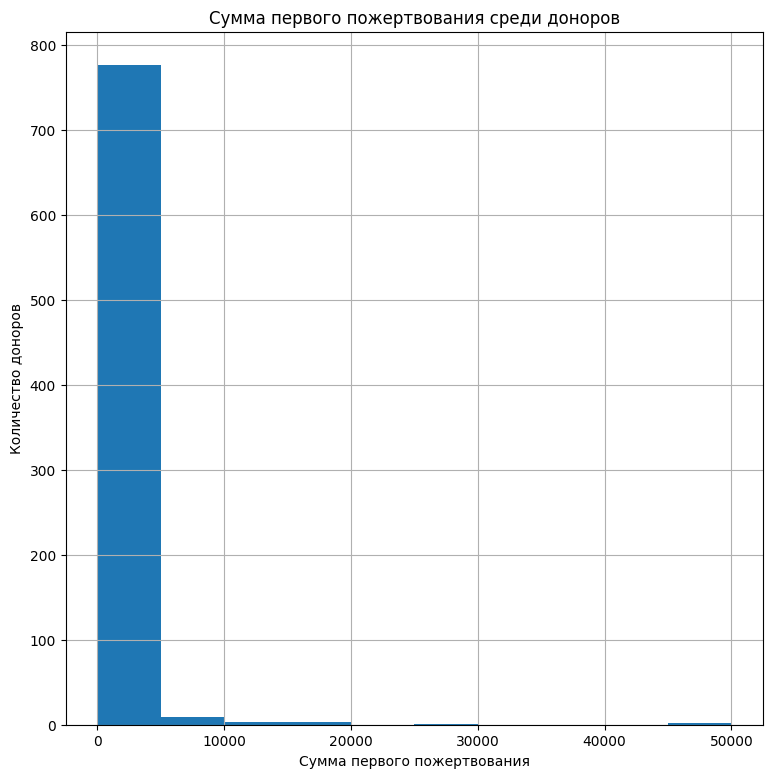

In [105]:
plt.figure(figsize=(9,9))
donors['сумма_первого_пожертвования'].hist()
plt.title('Сумма первого пожертвования среди доноров')
plt.xlabel('Сумма первого пожертвования')
plt.ylabel('Количество доноров')
plt.show()

Гистограмма не имеет вид нормального распределения, есть аномально большие значения

In [106]:
donors_clients_df['сумма_первого_пожертвования'].describe()

count      492.000000
mean       991.871951
std       2917.787032
min         10.000000
25%        300.000000
50%        450.000000
75%       1000.000000
max      50000.000000
Name: сумма_первого_пожертвования, dtype: float64

Миниамальная сумма пожертвования - 10 рублей, максимальная -  10000 рублей, средняя сумма пожертвования равна 774 рубля, медиана набора данных составила 450 рублей


In [107]:
donors_clients_df['сумма_первого_пожертвования'].value_counts().head(5)

300.0     107
500.0      82
1000.0     71
100.0      37
450.0      35
Name: сумма_первого_пожертвования, dtype: int64

В топ-5 по количеству доноров входят те доноры, которы жертвуют 300, 500, 1000, 100 и 450 рублей

In [108]:
# Посмотрим какие есть кампании первого пожертования
donors_clients_df['кампания_первого_пожертвования'].value_counts()

На уставную деятельность и содержание организации    490
#Больничкабежит                                        2
Name: кампания_первого_пожертвования, dtype: int64

490 пожертований были направлены на уставную деятельность и содержание организации и 2 пожертвования были направлены в рамках фандрайзингового проекта #Больничкабежит совмещающего в себе спорт, информирование о проблемах бездомности и общение.

In [109]:
donors_clients_df.query('кампания_первого_пожертвования == "#Больничкабежит"')

,id_x,первый_платеж,подписки_вкл,подписки_выкл,типы_оплаты,платежей_за_год,сумма_за_год,средний_платеж_в_год,всего_платежей,сумма_всего,...,id_y,тип_донора,дата_первого_пожертвования,сумма_первого_пожертвования,кампания_первого_пожертвования,кампании,платёжные_операторы,дата_последнего_пожертвования,общая_сумма_пожертвований,валюта
62,1086862,2022-11-29 22:04:35,0,0,карта,1,50,50,1,50,...,268.0,разовый,2022-11-29 22:04:00,50.0,#Больничкабежит,#Больничкабежит,MIXPLAT,2022-11-29 22:04:00,50.0,₽
503,1040244,2022-10-24 16:19:37,0,0,карта,1,300,300,1,300,...,194.0,разовый,2022-10-24 16:19:00,300.0,#Больничкабежит,#Больничкабежит,MIXPLAT,2022-10-24 16:19:00,300.0,₽


Всего в рамках проекта #Больничкабежит было собрано 350 рублей , платежи совершались 24 октября 2022 года и 29 ноября 2022 года

In [110]:
print('Минимальная дата первого платежа:',donors_clients_df['первый_платеж'].min())
print('Максимальная дата первого платежа:', donors_clients_df['первый_платеж'].max())

Минимальная дата первого платежа: 2021-11-17 14:39:43
Максимальная дата первого платежа: 2023-06-01 09:50:18


Минимальной датой первого платежа является 17 ноября 2021 года. Можно заметить, что даты первого платежа и первого пожертования (9 января 2022 г) не совпадают.
Максимальной датой первого платежа является 1 июня 2023 года. Эта дата также не совпадает с максимальной датой первого пожертвования (4 октября 2023 года). Следует уточнить у заказчика причину этих несоответствий

In [111]:
 donors_clients_df['подписки_вкл'].value_counts()


0    936
1    227
2      3
Name: подписки_вкл, dtype: int64

Всего три значения 0, 1 и 2



In [112]:
donors_clients_df[donors_clients_df['подписки_вкл'] == 2]

,id_x,первый_платеж,подписки_вкл,подписки_выкл,типы_оплаты,платежей_за_год,сумма_за_год,средний_платеж_в_год,всего_платежей,сумма_всего,...,id_y,тип_донора,дата_первого_пожертвования,сумма_первого_пожертвования,кампания_первого_пожертвования,кампании,платёжные_операторы,дата_последнего_пожертвования,общая_сумма_пожертвований,валюта
336,786419,2022-03-06 19:41:37,2,0,карта,19,2700,142.1,22,3000,...,96.0,разовый,2023-02-16 22:08:00,200.0,На уставную деятельность и содержание организации,На уставную деятельность и содержание организации,MIXPLAT,2023-06-16 22:08:00,1400.0,₽
769,944046,2022-08-24 06:41:32,2,0,карта,7,1350,192.85,7,1350,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1134,1360034,2023-03-25 17:16:46,2,0,"карта,терм,СБП",5,1500,300,5,1500,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN


Также видим, что есть три строки, где значение в столбце подписки_вкл = '2'

In [113]:
donors_clients_df['подписки_выкл'].value_counts()

0    1030
1     109
2      19
3       6
4       1
5       1
Name: подписки_выкл, dtype: int64

Всего столбец 'подписки_выкл' содержит 6 уникальных значений. Следует уточнить у заказчика, что представляют собой эти значения.

In [114]:
# Изучим столбец тип_оплаты
type_cart = donors_clients_df['типы_оплаты'].value_counts().reset_index()
type_cart.columns = ['type_of_payment','count']
type_cart['percent'] = round(type_cart['count'] / type_cart['count'].sum(),2)
type_cart

,type_of_payment,count,percent
0,карта,882,0.76
1,"терм,СБП",198,0.17
2,"карта,терм,СБП",59,0.05
3,"sms,карта",11,0.01
4,sms,11,0.01
5,"sms,карта,терм,СБП",3,0.00
6,"sms,терм,СБП",2,0.00


76 % доноров пользуются только картой при внесении пожертвований, 17 % доноров пользуются терминалом и СБП, 5 %пользуются картой, терминалом и СБП.

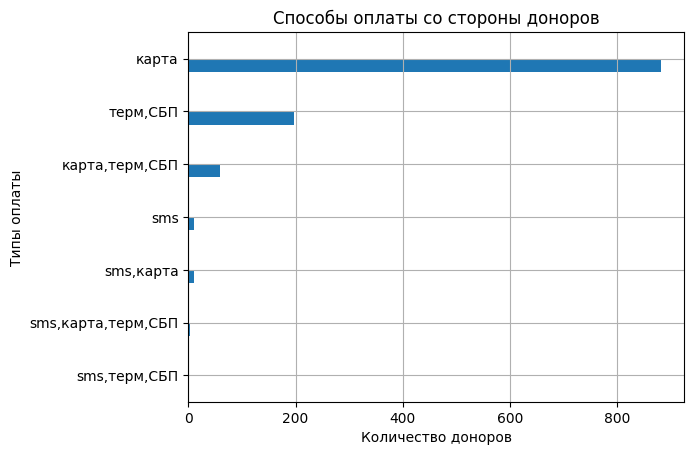

In [115]:
# построим столбчатую диаграмму
type_cart.sort_values(by='count',ascending = True).plot(kind='barh', x = 'type_of_payment', legend = False, grid = True)
plt.title('Способы оплаты со стороны доноров')
plt.xlabel('Количество доноров')
plt.ylabel('Типы оплаты')
plt.show()

В топ-3 самых популярных по типу оплаты способов можно выделить:
* карта,
* терм, СБП(система быстрых платежей)
* карта,терм,СБП(система быстрых платежей)

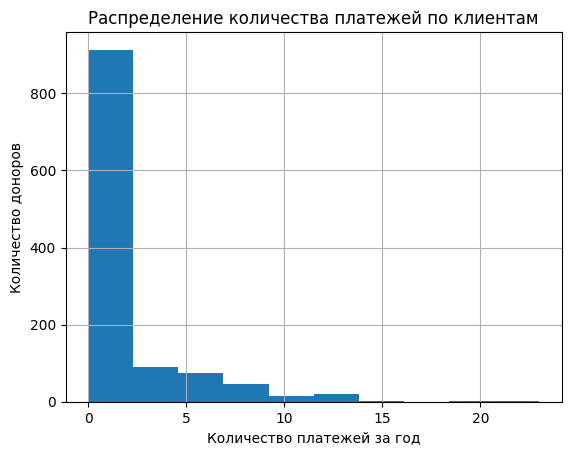

In [116]:
# изучим количество платежей за год
donors_clients_df['платежей_за_год'].hist()
plt.title('Распределение количества платежей по клиентам')
plt.xlabel('Количество платежей за год')
plt.ylabel('Количество доноров')
plt.show()

Гистограмма не имеет вид нормального распределения, есть выбросы в сторону больших значений.

In [117]:
donors_clients_df['платежей_за_год'].describe()

count    1166.000000
mean        2.013722
std         2.688041
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        23.000000
Name: платежей_за_год, dtype: float64

Среднее количество платежей за год составило 2 , медиана равна 1.

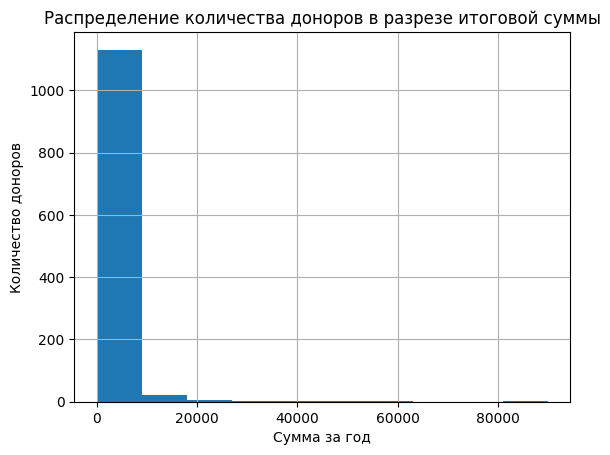

In [118]:
# Посчитаем какую сумму за год приносят доноры
donors_clients_df['сумма_за_год'].hist()
plt.title('Распределение количества доноров в разрезе итоговой суммы')
plt.xlabel('Сумма за год')
plt.ylabel('Количество доноров')
plt.show()

In [119]:
donors_clients_df['сумма_за_год'].describe()

count     1166.000000
mean      1577.422813
std       4826.925651
min          0.000000
25%        150.000000
50%        500.000000
75%       1100.000000
max      90000.000000
Name: сумма_за_год, dtype: float64

In [120]:
# находим 95 перцентиль
np.percentile(donors_clients_df['сумма_за_год'], 95)

5500.0

95 % значений в столбце 'сумма_за_год' менее 5500 рублей

In [121]:
donors_clients_df = donors_clients_df[donors_clients_df['сумма_за_год'] <= 5500]
len(donors_clients_df)

1110

<Axes: >

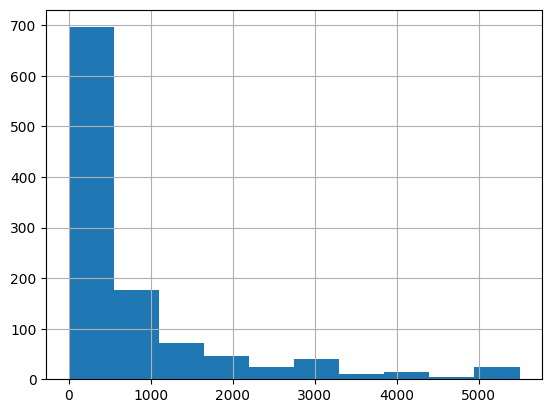

In [122]:
donors_clients_df['сумма_за_год'].hist()

In [123]:
donors_clients_df['сумма_за_год'].describe()

count    1110.000000
mean      844.166667
std      1103.736120
min         0.000000
25%       100.000000
50%       500.000000
75%      1000.000000
max      5500.000000
Name: сумма_за_год, dtype: float64

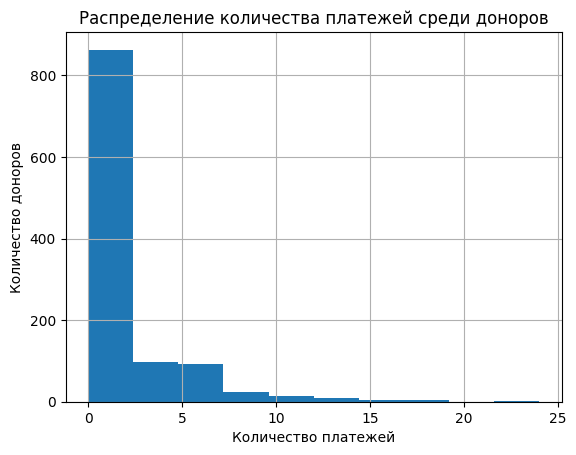

In [124]:
# построим гистограмму
donors_clients_df['всего_платежей'].hist()
plt.title('Распределение количества платежей среди доноров')
plt.xlabel('Количество платежей')
plt.ylabel('Количество доноров')
plt.show()

В большинстве своем доноры осуществляют 2 платежа. Гистограмма не имеет вид нормального распределения, есть аномально длинные хвосты в сторону больших значений

In [125]:
donors_clients_df['всего_платежей'].describe()

count    1110.000000
mean        2.024324
std         2.821140
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        24.000000
Name: всего_платежей, dtype: float64

In [126]:
donors_clients_df.columns

Index(['id_x', 'первый_платеж', 'подписки_вкл', 'подписки_выкл', 'типы_оплаты',
       'платежей_за_год', 'сумма_за_год', 'средний_платеж_в_год',
       'всего_платежей', 'сумма_всего', 'средний_платеж', 'сумма_за_месяц',
       'страны', 'регионы', 'последний_платеж', 'код', 'id_y', 'тип_донора',
       'дата_первого_пожертвования', 'сумма_первого_пожертвования',
       'кампания_первого_пожертвования', 'кампании', 'платёжные_операторы',
       'дата_последнего_пожертвования', 'общая_сумма_пожертвований', 'валюта'],
      dtype='object')

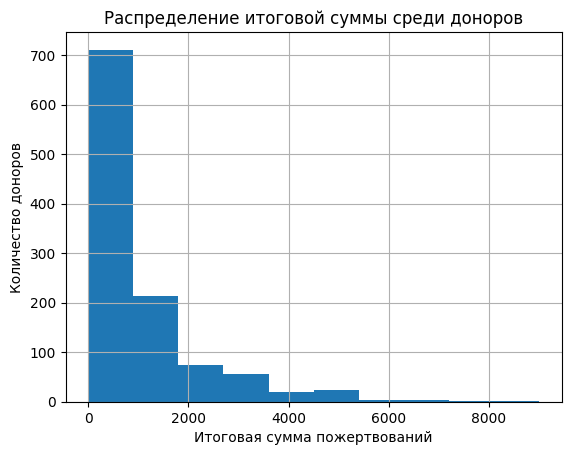

In [127]:
# построим гистограмму
donors_clients_df['сумма_всего'].hist()
plt.title('Распределение итоговой суммы среди доноров')
plt.xlabel('Итоговая сумма пожертвований')
plt.ylabel('Количество доноров')
plt.show()

In [128]:
donors_clients_df['сумма_всего'].describe()

count    1110.000000
mean      921.558559
std      1230.277834
min         0.000000
25%       100.000000
50%       500.000000
75%      1000.000000
max      9000.000000
Name: сумма_всего, dtype: float64

Cредняя итоговая сумма составила 897 рублей, медиана набора данных составила 500 рублей, межквартильный размах составил 900 рублей


In [129]:
donors_clients_df['сумма_за_месяц'].value_counts()

0    1110
Name: сумма_за_месяц, dtype: int64

In [130]:
# удалим столбец 'сумма_за_месяц'
donors_clients_df = donors_clients_df.drop(columns=['сумма_за_месяц'], axis = 1)

In [131]:
# Посмотрим на топ-10 стран по количеству доноров
top_countries = donors_clients_df['страны'].value_counts().reset_index()[:10]
top_countries.columns = ['country', 'count']
top_countries

,country,count
0,Россия,669
1,Россия\nСША,38
2,Германия,15
3,Нидерланды,14
4,Швеция,11
5,США,9
6,Латвия,9
7,Финляндия,7
8,Турция,7
9,Казахстан,7


<Figure size 1200x1000 with 0 Axes>

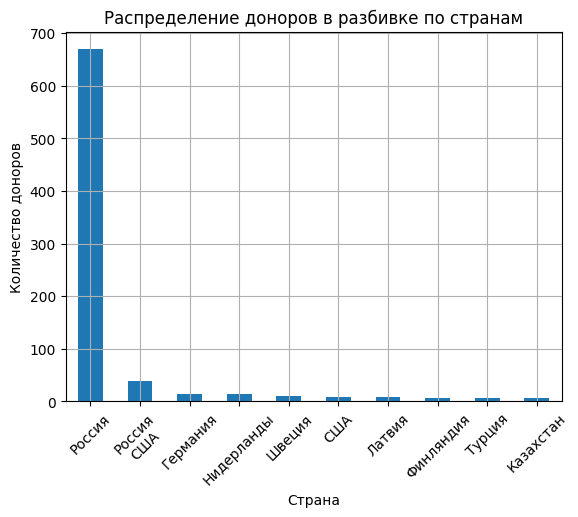

In [132]:
# построим столбчатую диаграмму
plt.figure(figsize=(12,10))
top_countries.plot(kind = 'bar', grid = True, x = 'country', legend = None)
plt.title('Распределение доноров в разбивке по странам')
plt.xlabel('Страна')
plt.ylabel('Количество доноров')
plt.xticks(rotation = 45)
plt.show()


Абсолютное большинство доноров живет в России, далее на втором месте по количеству находятся доноры из России и США, количество доноров в остальных странах распределено равномерно

In [133]:
# посмотрим на топ-10 регионов по количеству доноров
top_regions = donors_clients_df['регионы'].value_counts().reset_index()[:10]
top_regions.columns = ['region', 'count']
top_regions

,region,count
0,Санкт-Петербург,178
1,Ленинградская обл.,76
2,Кунене,74
3,Cuando Cubango,52
4,Московская обл.,40
5,Москва,35
6,Кунене\nСанкт-Петербург,18
7,Лен Стокгольм,9
8,Тверская обл.,9
9,Гессен,9


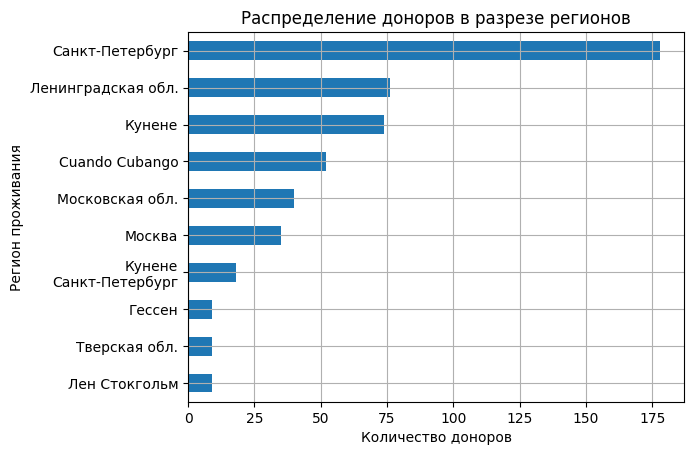

In [134]:
# построим столбчатую диаграмму
top_regions.sort_values(by='count',ascending=True).plot(kind = 'barh', grid = True, x = 'region', legend = None)
plt.title('Распределение доноров в разрезе регионов')
plt.xlabel('Количество доноров')
plt.ylabel('Регион проживания')
plt.show()

Среди доноров абсолютное большинство проживает в Санкт-Петербурге (178 человек), на втором и третьем месте доноры из Ленинградской области(76 человек) и Кунене, которая находится на территории Анголы (74 человека)

In [135]:
donors_clients_df['тип_донора'].value_counts()

разовый       424
постоянный     48
Name: тип_донора, dtype: int64

424 донора относятся к разовым, 48 доноров - постоянные

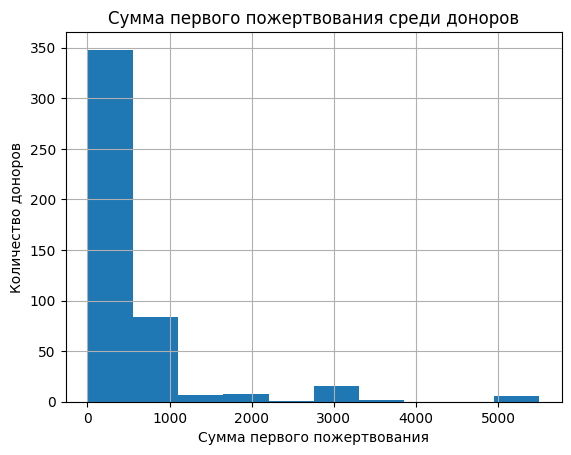

In [136]:
donors_clients_df['сумма_первого_пожертвования'].hist()
plt.title('Сумма первого пожертвования среди доноров')
plt.xlabel('Сумма первого пожертвования')
plt.ylabel('Количество доноров')
plt.show()

In [137]:
donors_clients_df['сумма_первого_пожертвования'].describe()

count     472.000000
mean      636.019068
std       808.500745
min        10.000000
25%       250.000000
50%       450.000000
75%       900.000000
max      5500.000000
Name: сумма_первого_пожертвования, dtype: float64

Средняя сумма пожертвования составила 636 рублей, а медиана - 450 рублей. Минимальная сумма первого пожертвования равна 10 рублей. Максимальная сумма пожертвования - 5500 рублей.

In [138]:
donors_clients_df['валюта'].value_counts()

₽    472
Name: валюта, dtype: int64

Основной и единственной валютой при транзакциях со стороны доноров стал российский рубль.

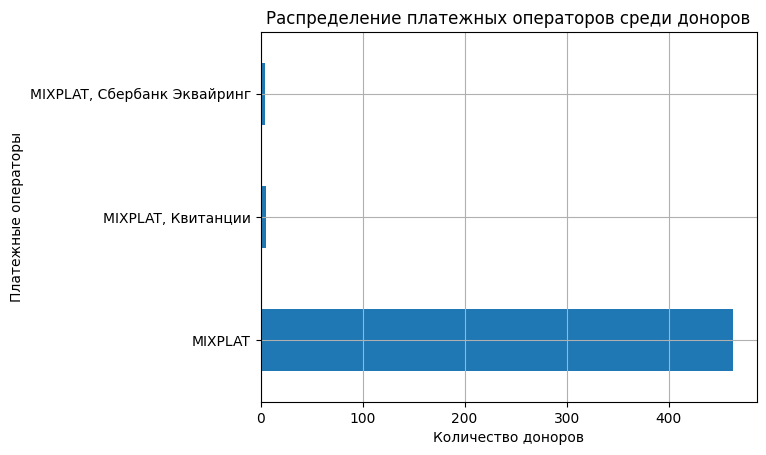

In [139]:
# построим столбчатую диаграмму
payment_operators = donors_clients_df['платёжные_операторы'].value_counts().reset_index()
payment_operators.columns = ['payment_operators', 'count']
payment_operators.plot(kind='barh', grid = True, x ='payment_operators', legend = None)
plt.title('Распределение платежных операторов среди доноров')
plt.xlabel('Количество доноров')
plt.ylabel('Платежные операторы')
plt.show()

Абсолютное большинство доноров пользуются платежной системой MIXPLAT. Также есть доноры, которые пользуются MIXPLAT и квитанциями. Небольшое число доноров используют также Сбербанк Эквайринг

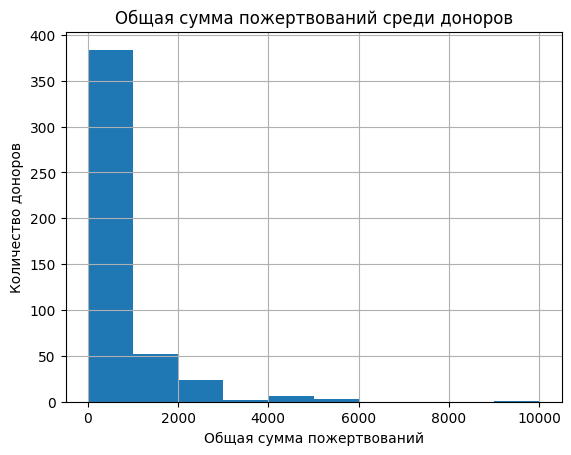

In [140]:
donors_clients_df['общая_сумма_пожертвований'].hist()
plt.title('Общая сумма пожертвований среди доноров')
plt.xlabel('Общая сумма пожертвований')
plt.ylabel('Количество доноров')
plt.show()

Гистограмма не имеет вид нормального распределения. Есть аномальные выбросы

In [141]:
donors_clients_df['общая_сумма_пожертвований'].describe()

count      472.000000
mean       841.915254
std       1025.850141
min         10.000000
25%        300.000000
50%        500.000000
75%       1000.000000
max      10000.000000
Name: общая_сумма_пожертвований, dtype: float64

In [142]:
df_adgrants_last.shape

(254356, 21)

In [145]:
df_adgrants_last['№ кампании'].value_counts()

83825936    47690
82164908    34843
84199193    28033
84173536    24696
84171252    19023
89785325    13876
84641858     9525
84725588     9475
89727699     9234
84755241     8892
89800500     8292
86426984     8227
84668594     7340
86413952     6296
84724307     5163
86427768     4662
87637100     2569
84728956     1598
84716344     1511
84176025     1396
84721444     1034
84707741      933
84704851       48
Name: № кампании, dtype: int64

Можно заметить что номера кампаний соответствуют самим кампаниям. Например, под № 83825936 'Пакет_Бездомашний очаг_Верующие_ключи-интересы' и так далее.

In [146]:
df_adgrants_last.columns

Index(['дата', 'кампания', '№ кампании', 'метка', 'условие_показа', 'пол',
       'уровень_платежеспособности', 'возрастная_категория', 'показы',
       'взвешенные_показы', 'клики', 'ctr_(%)', 'wctr_(%)', 'расход_(руб.)',
       'ср._объём_трафика', 'ср._позиция_кликов', 'доход_(руб.)',
       'прибыль_(руб.)', 'сумма_вс', 'цена_вc_(руб.)', 'доля_вc_(%)'],
      dtype='object')

In [147]:
df_adgrants_last['метка'].value_counts()

без метки    254356
Name: метка, dtype: int64

In [148]:
# удалим столбец 'метка'
df_adgrants_last = df_adgrants_last.drop(columns = ['метка'], axis =1)


In [149]:
top_10 = df_adgrants_last['условие_показа'].value_counts().reset_index()[:10]
top_10.columns = ['условие показа', 'количество']
top_10

,условие показа,количество
0,'---autotargeting,23779
1,благотворительный фонд,2393
2,помощь бездомным,2165
3,пожертвование,2127
4,благотворительность,1973
5,фонд помощи,1854
6,волонтерские организации,1799
7,работа волонтером,1795
8,волонтер года,1794
9,волонтеры спб,1774


In [150]:
count = top_10['количество'].value_counts()

<Figure size 1000x1000 with 0 Axes>

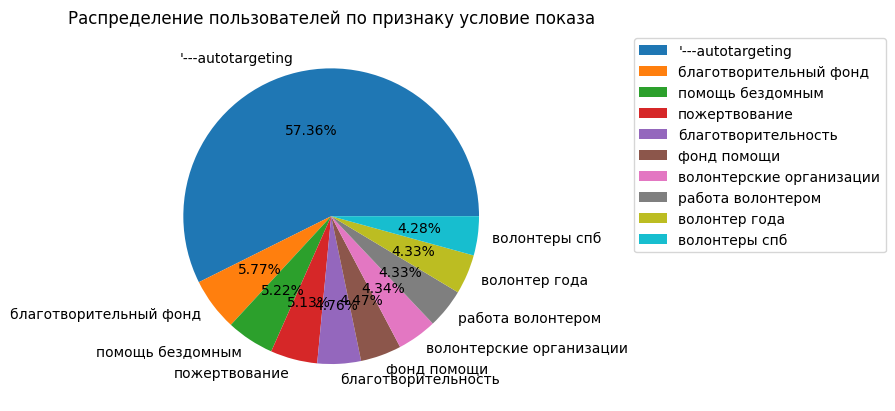

In [151]:
# построим круговую диаграмму для признака условие показа

plt.figure(figsize= (10,10))
fig, ax = plt.subplots()

sizes = top_10['количество']
labels = top_10['условие показа']

ax.pie(sizes,labels = labels, autopct='%1.2f%%')
ax.set_title('Распределение пользователей по признаку условие показа')

plt.legend(bbox_to_anchor=( 1.30 , 1 ), loc='upper left')
plt.show()



Согласно данным круговой диаграммы можно сделать следующие выводы:

 1.Среди условий показа с большим преимуществом лидирует autotargeting (57.36%);

 2.На втором месте среди условий показа благотворительный фонд (5.77 %);

 3.На третьем месте - помощь бездомным (5.22%);

 4.Остальные условия показа распределены примерно равномерно

In [152]:
gender = df_adgrants_last['пол'].value_counts().reset_index()
gender.columns = ['gender', ' count']
gender = gender.drop(2)
gender

,gender,count
0,женский,116770
1,мужской,115318


<Figure size 900x900 with 0 Axes>

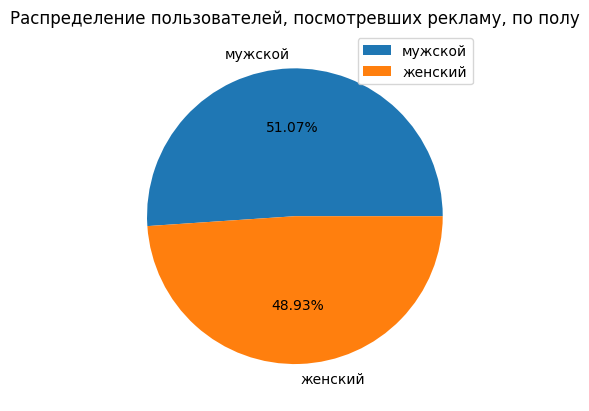

In [153]:
# построим круговую диаграмму для признака условие показа

plt.figure(figsize= (9,9))
fig, ax = plt.subplots()

sizes = [144240,138204]
labels = ['мужской','женский']

ax.pie(sizes,labels = labels, autopct='%1.2f%%')
ax.set_title('Распределение пользователей, посмотревших рекламу, по полу')

plt.legend()
plt.show()




Среди людей, кто посмотрели рекламу, 51.07 % мужчин и 48.93 % женщин

<Figure size 1000x1000 with 0 Axes>

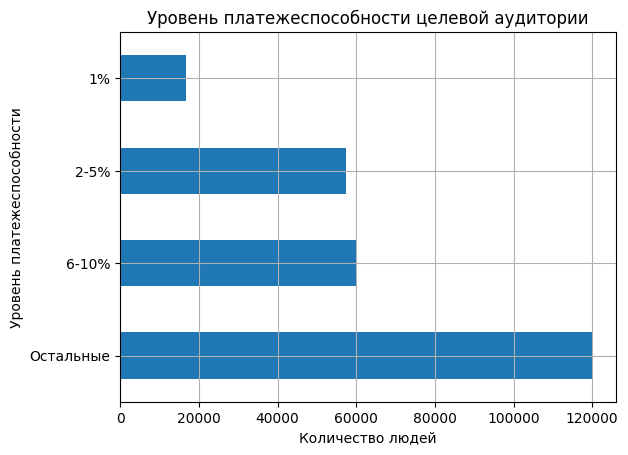

In [154]:
# построим столбчатую диаграмму
ability_to_pay = df_adgrants_last['уровень_платежеспособности'].value_counts().reset_index()
ability_to_pay.columns = ['уровень_платежеспособности','количество']
plt.figure(figsize=(10,10))
ability_to_pay.plot(kind='barh',grid=True, x ='уровень_платежеспособности', legend = False)
plt.title('Уровень платежеспособности целевой аудитории')
plt.xlabel('Количество людей')
plt.ylabel('Уровень платежеспособности')
plt.show()

Среди людей, посмотревших рекламу, преобладает категория: 'остальные', затем на втором месте люди с уровнем платежеспособности:6-10%, затем люди с уровнем платежеспособности 2-5 %. Наименьшее число людей с уровнем платежеспособности в 1 %.

In [155]:
# изучим возраст людей, посмотревших рекламу

age = df_adgrants_last['возрастная_категория'].value_counts().reset_index()
age.columns = ['возрастная категория', 'количество']
age

,возрастная категория,количество
0,25-34,48382
1,35-44,46731
2,старше 55,43478
3,45-54,39928
4,18-24,37393
5,не определен,22859
6,младше 18,15585


<Figure size 1200x1200 with 0 Axes>

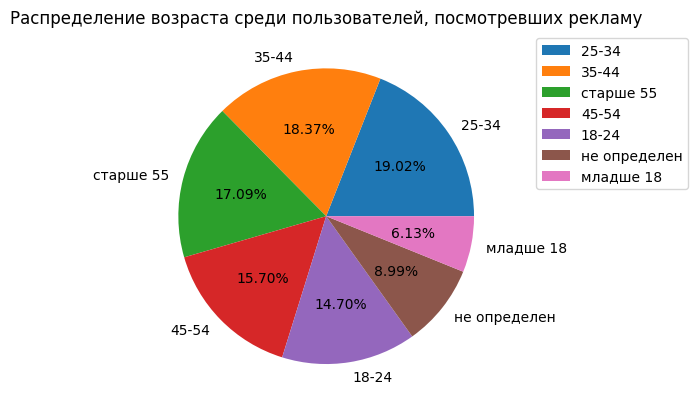

In [156]:
# построим круговую диаграмму

plt.figure(figsize= (12,12))
fig, ax = plt.subplots()

sizes = age['количество']
labels = age['возрастная категория']

ax.pie(sizes,labels = labels, autopct='%1.2f%%')
ax.set_title('Распределение возраста среди пользователей, посмотревших рекламу')

plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
plt.show()


Согласно данным круговой диаграммы можно сделать следующие выводы:
* наибольший процент людей, посмотревших рекламу, у людей в возрасте от 25 до 34 лет (19.02  %);
* на втором месте люди в возрасте от 35 до 44 лет(18.37%);
* на третьем месте люди в возрасте старше 55 лет(17.09%)
* наименьшую заинтересованность в рекламе проявили люди младше 18 лет (6.13 %)


In [157]:
# количество уникальных значений в столбце показы
df_adgrants_last['показы'].nunique()

2110

In [158]:
# количество уникальных значений в столбце клики
df_adgrants_last['клики'].nunique()

79

In [160]:
# посмотрим на показатель взвешенные показы
wctr = df_adgrants_last['wctr_(%)'].value_counts().reset_index()
wctr.columns = ['wctr', 'count']
wctr_top_20 = wctr[:20]
wctr_top_20

,wctr,count
0,0.00,238491
1,100.00,321
2,33.33,275
3,25.00,259
4,50.00,250
5,20.00,229
6,16.67,228
7,14.29,215
8,12.50,200
9,7.69,177


In [161]:
print('Минимальный средний объем трафика:',df_adgrants_last['ср._объём_трафика'].min())
print('Максимальный средний объем трафика:',df_adgrants_last['ср._объём_трафика'].max())

Минимальный средний объем трафика: 0.00
Максимальный средний объем трафика: 100.00


In [162]:
df_adgrants_last['доход_(руб.)'].value_counts()

0.00         254326
200.00           19
30200.00          3
400.00            3
600.00            2
301800.00         1
100200.00         1
1000.00           1
Name: доход_(руб.), dtype: int64

In [163]:
# удалим столбец df_adgrants_last

df_adgrants_last = df_adgrants_last.drop(columns=['доход_(руб.)'], axis = 1)

Выводы по исследовательскому анализу данных:
В результате проведенного исследовательского анализа данных были получены
следующие результаты:
* Среди доноров 441 разовых, что составляет 90 % от общего количества и 51 постоянных, что составляет 10 % от общего количества доноров;
* В нашем распоряжении данные о пожертвованиях клиентов, совершенных с 9 января 2022 года по 04 октября 2023 года;
* 475 пожертований были направлены на уставную деятельность и содержание организации и 2 пожертвования были направлены в рамках фандрайзингового проекта #Больничкабежит совмещающего в себе спорт, информирование о проблемах бездомности и общение;
* 76 % доноров пользуются только картой при внесении пожертвований, 17 % доноров пользуются терминалом и СБП, 5 %пользуются картой, терминалом и СБП;
* Среди доноров абсолютное большинство проживает в Санкт-Петербурге (178 человек), на втором и третьем месте доноры из Ленинградской области(76 человек) и Кунене, которая находится на территории Анголы (74 человека);
* Абсолютное большинство доноров живет в России, далее на втором месте по количеству находятся доноры из России и США, количество доноров в остальных странах распределено равномерно;
* Подавляющее большинство доноров пользуются платежной системой MIXPLAT. Также есть доноры, которые пользуются MIXPLAT и квитанциями. Небольшое число доноров используют также Сбербанк Эквайринг
* Среди людей,посмотревших рекламу, 51.07 % мужчин и 48.93 % женщин;
* Наибольший процент людей, посмотревших рекламу, у людей в возрасте от 25 до 34 лет (19.02 %);
* Наименьшую заинтересованность в рекламе проявили люди младше 18 лет (6.13 %);



##  Проверка статистических гипотез


Сформулируем гипотезы:

Нулевая гипотеза: Н0 - среднее количество кликов у мужчин меньше  среднего количества кликов у женщин

Альтернативная гипотеза Н1 -   среднее количество кликов у мужчин больше или равно среднему количеству кликов у женщин



In [164]:

# Cформируем контрольную и экспериментальную выборки

sample_a = df_adgrants_last[df_adgrants_last['пол'] == 'мужской']['клики']
sample_b = df_adgrants_last[df_adgrants_last['пол'] == 'женский']['клики']

In [165]:
len(sample_a)

115318

In [166]:
len(sample_b)

116770

Для проверки статистической гипотезы будем использовать t-критерий Стьюдента

In [167]:
results = st.ttest_ind(sample_a, sample_b,  alternative = 'less', equal_var = True)

# уровень статистической значимости
alpha = 0.05

print('Pvalue:', results.pvalue)

if results.pvalue < alpha:

    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')








Pvalue: 6.92749695400706e-49
Отвергаем нулевую гипотезу


Получившееся значение pvalue < 0.05. Таким образом, на имеющихся данных на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Cреднее количество кликов у мужчин больше или равно среднему количеству кликов у женщин


Сформулируем гипотезы:

Нулевая гипотеза - Н0
Среднее количество показов у пользователей в возрасте от 25 до 34 лет меньше среднего количества показов упользователей в возрасте от 35 до 44 лет

Альтернативная гипотез - H1 Среднее количество показов у пользователей в возрасте от 25 до 34 лет больше или равно среднему количеству показов у пользователей в возрасте от 35 до 44 лет


In [168]:
# формируем контрольную и экспериментальную выборки
group_a = df_adgrants_last[df_adgrants_last['возрастная_категория'] == '25-34']['показы']
group_b = df_adgrants_last[df_adgrants_last['возрастная_категория'] == '35-44']['показы']

In [169]:
len(group_a)



48382

In [170]:
len(group_b)

46731

Для проверки статистической гипотезы будем использовать t-критерий Стьюдента

In [171]:
results = st.ttest_ind(group_a, group_b,  alternative = 'less', equal_var = True)

# уровень статистической значимости
alpha = 0.05

print('Pvalue:', results.pvalue)

if results.pvalue < alpha:

    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')



Pvalue: 0.004015504756360562
Отвергаем нулевую гипотезу


Получившееся значение pvalue < 0.05. Таким образом, на имеющихся данных на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Среднее количество показов у пользователей в возрасте от 25 до 34 лет больше или равно среднему количеству показов у пользователей в возрасте от 35 до 44 лет

Выводы по проверке статистических гипотез:

* Были сформулированы и проверены статистические гипотезы о равенстве среднего количества кликов у пользователей среди мужчин и женщин и о равенстве среднего количества показов у пользователей в возрасте от 25 до 34 лет и у пользователей от 35 до 44 лет
* По результатам проверок статистических гипотез обнаружено:
  1. есть статистически значимая разница между средним количеством кликов у женщин и средним количеством кликов у мужчин
  2. есть статистически значимая разница между средним количеством показов у пользователей в возрасте от 25 до 34 лет и у пользователей в возрасте от 35 до 44 лет
    

## Общие выводы и рекомендации для заказчика

Проект 'Благотворительная больница НКО' завершен .В ходе выполнения проектной работы были изучены и решены цели исследования.

Проведенное исследование содержало в себе 4 основных шага:

1. На первом шаге исследования были загружены данные и изучена общая информация о донорах Благотворительной больницы НКО и рекламных кампаниях. Изучили общую информацию о каждом датасете. Определили исходный размер каждой из таблиц, подготовили данные к дальнейшей предобработке.

2. На этапе исследовательского анализа данных получили следующие результаты:

   * Среди доноров 441 разовых, что составляет 90 % от общего количества и 51 постоянных, что составляет 10 % от общего количества доноров;
   * В нашем распоряжении данные о пожертвованиях клиентов, совершенных с 9 января 2022 года по 04 октября 2023 года;
   * 475 пожертований были направлены на уставную деятельность и содержание организации и 2 пожертвования были направлены в рамках фандрайзингового проекта #Больничкабежит совмещающего в себе спорт, информирование о проблемах бездомности и общение;
   *  76 % доноров пользуются только картой при внесении пожертвований, 17 % доноров пользуются терминалом и СБП, 5 %пользуются картой, терминалом и СБП;
   * Среди доноров абсолютное большинство проживает в Санкт-Петербурге (178 человек), на втором и третьем месте доноры из Ленинградской области(76 человек) и Кунене, которая находится на территории Анголы (74 человека);
   * Абсолютное большинство доноров живет в России, далее на втором месте по количеству находятся доноры из России и США, количество доноров в остальных странах распределено равномерно;
   * Подавляющее большинство доноров пользуются платежной системой MIXPLAT. Также есть доноры, которые пользуются MIXPLAT и квитанциями. Небольшое число доноров используют также Сбербанк Эквайринг
   *  Среди людей,посмотревших рекламу, 51.07 % мужчин и 48.93 % женщин;
   *  Наибольший процент людей, посмотревших рекламу, у людей в возрасте от 25 до 34 лет (19.02 %);
   *  Наименьшую заинтересованность в рекламе проявили люди младше 18 лет (6.13%);

   3. На третьем шаге исследования были сформулированы и проверены статистические гипотезы о равенстве среднего количества кликов у мужчин и женщин и о равенстве среднего количества показов у пользователей в возрасте от 25 до 34 лет и у пользователей в возрасте от 35 до 44 лет

 По результатам проверок статистических гипотез обнаружено:

   * есть статистически значимая разница между средним количеством кликов у женщин и средним количеством кликов у мужчин;
   * есть статистически значимая разница между средним количеством показов у пользователей в возрасте от 25 до 34 лет и у пользователей в возрасте от 35 до 44 лет

 По результатам проведенного исследования можно дать определенные рекомендации для заказчика:
  * по количеству доноров лидирует возрастная категория от 25 до 34 лет. Рекомендуется заказчику плотнее работать с этой возрастной категорией;
  
  Также есть некоторые вопросы, которые требуют разъяснения у заказчика.
  1. Несовпадения минимальных и максимальных дат первого пожертвования и даты платежа.
  2. Не понятны значения в столбцах подписки вкл. и подписки выкл.
  

Ссылка на презентацию: https://docs.google.com/presentation/d/1OPgf5apzxr7IBphOelvm8pExo_ciSTkD/edit?usp=drive_link&ouid=114726374443435244029&rtpof=true&sd=true  